# Project: Wrangling and Analyze Data

In [3]:
# import libraries

import pandas as pd
import json
import requests
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


## Data Gathering

1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [4]:
tweets_archive = pd.read_csv(r'C:\Users\HP\Desktop\Project2-WrangleAndAnalyzeData\twitter-archive-enhanced.csv')
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"	
response = requests.get(url, stream=True)
with open('image-predictions.tsv', 'wb') as file:
    file.write(response.content)


In [6]:
images = pd.read_csv(r'C:\Users\HP\Desktop\Project2-WrangleAndAnalyzeData\image-predictions.tsv', sep='\t')
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [7]:
import tweepy

consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)


api = tweepy.API(auth, parser=tweepy.parsers.JSONParser(), wait_on_rate_limit=True)

In [ ]:
# downloading tweets from twitter
tweets =[]
ids_with_no_tweet = []

for tweet_id in tweets_archive['tweet_id']:
    try:
        tweets.append(api.get_status(tweet_id, tweet_mode='extended'))
    except:
        ids_with_no_tweet.append(tweet_id)
    
print(print("There are {} tweets available and {} tweet ids were not accessible".format(len(tweets), len(ids_with_no_tweet))))

In [ ]:
# writing json to a file
with open('tweets_json.txt', 'w')  as outfile:
    json.dump(tweets, outfile)
    

In [8]:
# reading the text file
tweet_data = []
with open('tweets_json.txt', 'r') as file:
    for line in file.readlines():
        twits = json.loads(line)
        for entry in twits:
            id = entry['id']
            retweet_count = entry['retweet_count']
            favorite_count = entry['favorite_count']
            tweet_data.append({'id':id,
                       'retweet_count':retweet_count,
                       'favorite_count':favorite_count})
       
# reading data into a dataframe
scraped_tweets = pd.DataFrame(tweet_data, columns=['id', 'retweet_count', 'favorite_count'])



In [9]:
scraped_tweets.head()

,id,retweet_count,favorite_count
0,892420643555336193,6969,33693
1,892177421306343426,5272,29218
2,891815181378084864,3464,21974
3,891689557279858688,7191,36785
4,891327558926688256,7715,35178


## Assessing Data


In [10]:
print(scraped_tweets.head())
print(images.head())
print(tweets_archive.head())

                   id  retweet_count  favorite_count
0  892420643555336193           6969           33693
1  892177421306343426           5272           29218
2  891815181378084864           3464           21974
3  891689557279858688           7191           36785
4  891327558926688256           7715           35178
             tweet_id                                          jpg_url  \
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   

   img_num                      p1   p1_conf  p1_dog                  p2  \
0        1  Welsh_springer_spaniel  0.465074    True              collie   
1        1                 redbone  0.506826    True  miniature_pinscher   
2        

In [11]:
print (tweets_archive.info())
print(images.info())
print(scraped_tweets.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [12]:
print(tweets_archive.isnull().sum())
print(images.isnull().sum())
print(scraped_tweets.isnull().sum())

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64
tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64
id                0
retweet_count     0
favorite_count    0
dtype: int64


In [36]:
tweets_archive.expanded_urls.isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2351    False
2352    False
2353    False
2354    False
2355    False
Name: expanded_urls, Length: 2356, dtype: bool

In [37]:
tweets_archive.describe()
images.describe()
scraped_tweets.describe()

,id,retweet_count,favorite_count
count,2.327000e+03,2327.000000,2327.000000
mean,7.417930e+17,2458.665664,7026.286205
std,6.820795e+16,4163.678516,10919.249221
min,6.660209e+17,1.000000,0.000000
25%,6.781394e+17,492.500000,1220.500000
50%,7.178418e+17,1144.000000,3037.000000
75%,7.986547e+17,2844.500000,8565.000000
max,8.924206e+17,70330.000000,144246.000000


In [38]:
tweets_archive.duplicated().sum()

0

In [39]:
tweets_archive['rating_denominator'].sort_values()


313       0
2335      2
516       7
1576     10
1575     10
       ... 
1635    110
1779    120
1634    130
902     150
1120    170
Name: rating_denominator, Length: 2356, dtype: int64

In [40]:
lowest_denominator = tweets_archive.loc[tweets_archive['rating_denominator'] == 0]
lowest_denominator.text


313    @jonnysun @Lin_Manuel ok jomny I know you're e...
Name: text, dtype: object

In [41]:
tweets_archive['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [42]:
tweets_archive.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2121,670408998013820928,NaN,NaN,2015-11-28 01:08:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Peanut. He was the World Table Tennis ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670408998...,10,10,Peanut,None,None,None,None


In [44]:
tweets_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [45]:
tweets_archive.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2], dtype=int64)

In [46]:
# Finding the image prediction with the highest prediction
images[['p1_conf', 'p2_conf', 'p3_conf']].max(axis=1)

0       0.465074
1       0.506826
2       0.596461
3       0.408143
4       0.560311
          ...   
2070    0.555712
2071    0.170278
2072    0.716012
2073    0.323581
2074    0.097049
Length: 2075, dtype: float64

In [47]:
images.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1312,754482103782404096,https://pbs.twimg.com/ext_tw_video_thumb/75448...,1,tub,0.596796,False,bathtub,0.381098,False,shower_curtain,0.017629,False
1706,817536400337801217,https://pbs.twimg.com/media/C1h4_MEXUAARxQF.jpg,2,pug,0.971358,True,French_bulldog,0.028518,True,Boston_bull,0.000086,True
150,668641109086707712,https://pbs.twimg.com/media/CUd9ivxWUAAuXSQ.jpg,1,vacuum,0.432594,False,pug,0.146311,True,toilet_tissue,0.024500,False
1186,739238157791694849,https://pbs.twimg.com/ext_tw_video_thumb/73923...,1,Eskimo_dog,0.503372,True,Siberian_husky,0.390413,True,malamute,0.080901,True
1057,714631576617938945,https://pbs.twimg.com/media/CerhoBWWAAA5eLL.jpg,1,meerkat,0.143497,False,weasel,0.117402,False,black-footed_ferret,0.099933,False


In [48]:
tweets_archive.loc[tweets_archive['name'] == 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo
24,887343217045368832,NaN,NaN,2017-07-18 16:08:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887343217...,13,10,None,None,None,None,None
25,887101392804085760,NaN,NaN,2017-07-18 00:07:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2342,666082916733198337,NaN,NaN,2015-11-16 02:38:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a well-established sunblockerspan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666082916...,6,10,None,None,None,None,None
2343,666073100786774016,NaN,NaN,2015-11-16 01:59:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Let's hope this flight isn't Malaysian (lol). ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666073100...,10,10,None,None,None,None,None
2344,666071193221509120,NaN,NaN,2015-11-16 01:52:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a northern speckled Rhododendron....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666071193...,9,10,None,None,None,None,None
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None


In [49]:
scraped_tweets.sample()

,id,retweet_count,favorite_count
399,822489057087389700,5932,17059


In [50]:
tweets_archive.sample(10)
# some dogs have also have 'a 'inputed as names

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2012,672239279297454080,NaN,NaN,2015-12-03 02:21:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ridley. He doesn't know how to couch. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672239279...,7,10,Ridley,None,None,None,None
598,798686750113755136,NaN,NaN,2016-11-16 00:38:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: Say hello to Jack (pronounced ""...",6.833919e+17,4.196984e+09,2016-01-02 20:58:09 +0000,https://twitter.com/dog_rates/status/683391852...,11,10,Jack,None,None,None,None
2328,666396247373291520,NaN,NaN,2015-11-16 23:23:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Oh goodness. A super rare northeast Qdoba kang...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666396247...,9,10,None,None,None,None,None
1675,682242692827447297,NaN,NaN,2015-12-30 16:51:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Samson. He patrols his waters on the b...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/682242692...,11,10,Samson,None,None,None,None
344,832032802820481025,NaN,NaN,2017-02-16 01:04:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Miguel. He was the only remaining dogg...,NaN,NaN,NaN,"https://www.petfinder.com/petdetail/34918210,h...",12,10,Miguel,doggo,None,None,None
2255,667773195014021121,NaN,NaN,2015-11-20 18:35:10 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is a rare Hungarian Pinot named Jessiga. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667773195...,8,10,a,None,None,None,None
1238,712097430750289920,NaN,NaN,2016-03-22 02:03:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I can't even comprehend how confused this dog ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/712097430...,10,10,None,None,None,None,None
1321,706310011488698368,NaN,NaN,2016-03-06 02:46:44 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very sleepy pupper. Thinks it's an ai...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/706310011...,12,10,None,None,None,pupper,None
1279,708845821941387268,NaN,NaN,2016-03-13 02:43:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a pupper with magic eyes. Not wearing a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/708845821...,9,10,None,None,None,pupper,None
2102,670679630144274432,NaN,NaN,2015-11-28 19:04:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Pluto. He's holding little waddling do...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670679630...,8,10,Pluto,None,None,None,None


In [51]:
tweets_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [52]:
tweets_archive.loc[tweets_archive['rating_denominator'] > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,NaN,NaN,2016-03-27 01:29:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None
1254,710658690886586372,NaN,NaN,2016-03-18 02:46:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/710658690...,80,80,None,None,None,None,None


In [53]:
tweets_archive.loc[tweets_archive['rating_denominator'] < 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
2335,666287406224695296,NaN,NaN,2015-11-16 16:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is an Albanian 3 1/2 legged Episcopalian...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [54]:
print(scraped_tweets.columns)
print(tweets_archive.columns)
print(images.columns)

Index(['id', 'retweet_count', 'favorite_count'], dtype='object')
Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')
Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')


### Quality issues
1.- Null values in the tweets_arcive table. these include: in repl to status id, in reply to user id, retweetedd status id, retweeted status user id, retweeted status timestamp, expanded urls.


2.Wrong datatypes in the tweets_arcive table(tweet_id, rating numerator, rating denominator), scraped tweets_id, images(tweet_id, img_num)

3.Some ratings have wrong ratings esp tweets with rating denominators <10>70

4.Most dogs have wrong dog types.  These dogs have no information on their dog types.

5.we only need tweets on and before august 1 2017

6.the dog prediction for some tweet ids are false. this means that they are not dog types

7.There are three dog predictions but we only need one (the one with the highest prediction)

8.Wrong dog names. Most dogs have no names and have incorrect names written for them

### Tidiness issues
1.Table scraped tweets and tweets archive should be a single table

2.In tweets archive table, columns doggo, floofer, fluffer, pupper, puppo should be a single column

## Cleaning Data
In this section, I'll clean **all** of the issues you documented while assessing. 


In [55]:
# Make copies of original pieces of data
dirtytweets_archive = tweets_archive.copy()
dirtyscraped_tweets = scraped_tweets.copy()
dirtyimages = images.copy()

### Issue #1:
we only need tweets on and before august 1 2017

#### Code

In [56]:
tweets_archive['timestamp'] = pd.to_datetime(tweets_archive['timestamp'], format='%Y-%m-%d')
tweets_archive = tweets_archive.loc[(tweets_archive['timestamp'] <= '2017-08-01')]

#### Test

In [57]:
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 2 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2354 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2354 non-null   datetime64[ns, UTC]
 4   source                      2354 non-null   object             
 5   text                        2354 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2295 non-null   object             
 10  rating_numerator            2354 non-null   int64           

### Issue #2:
 Null values in the tweets_arcive table. these include: in repl to status id, in reply to user id, retweetedd status id, retweeted status user id, retweeted status timestamp, expanded urls.

#### Code

In [58]:
# filtering tweets_archive by non null retweets id
tweets_archive = tweets_archive[tweets_archive.retweeted_status_id.isnull()]
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2173 non-null   int64              
 1   in_reply_to_status_id       78 non-null     float64            
 2   in_reply_to_user_id         78 non-null     float64            
 3   timestamp                   2173 non-null   datetime64[ns, UTC]
 4   source                      2173 non-null   object             
 5   text                        2173 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2115 non-null   object             
 10  rating_numerator            2173 non-null   int64           

In [59]:
# dropping irrelevant columns
tweets_archive.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'source', 'retweeted_status_id','retweeted_status_user_id', 
                    'retweeted_status_timestamp'], axis=1, inplace=True)
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   int64              
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   text                2173 non-null   object             
 3   expanded_urls       2115 non-null   object             
 4   rating_numerator    2173 non-null   int64              
 5   rating_denominator  2173 non-null   int64              
 6   name                2173 non-null   object             
 7   doggo               2173 non-null   object             
 8   floofer             2173 non-null   object             
 9   pupper              2173 non-null   object             
 10  puppo               2173 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.7+ KB


#### Test

In [60]:
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 2 to 2355
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   int64              
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   text                2173 non-null   object             
 3   expanded_urls       2115 non-null   object             
 4   rating_numerator    2173 non-null   int64              
 5   rating_denominator  2173 non-null   int64              
 6   name                2173 non-null   object             
 7   doggo               2173 non-null   object             
 8   floofer             2173 non-null   object             
 9   pupper              2173 non-null   object             
 10  puppo               2173 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(7)
memory usage: 203.7+ KB


### Issue #3:
In tweets archive table, columns doggo, floofer, fluffer, pupper, puppo should be a single column

In [61]:
# combining doggo, floofer and puppo columns into a single column dog type
tweets_archive = pd.melt(tweets_archive, id_vars=['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator', 
                                                     'rating_denominator', 'name'], var_name='dog_type', value_name='dogs')
tweets_archive.head()
tweets_archive.drop(['dogs'], axis=1, inplace=True)


#### Test
tweets_archive.head()

In [62]:
# most tweet ids have wrong dog types or no dog type at all
tweets_archive.drop(['dog_type'], axis=1, inplace=True)
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8692 entries, 0 to 8691
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            8692 non-null   int64              
 1   timestamp           8692 non-null   datetime64[ns, UTC]
 2   text                8692 non-null   object             
 3   expanded_urls       8460 non-null   object             
 4   rating_numerator    8692 non-null   int64              
 5   rating_denominator  8692 non-null   int64              
 6   name                8692 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 475.5+ KB


In [63]:
# after melting the doggo, floofer, puppo, pupper columns the dataframe was duplicated 3 times and i ended up with 6519 duplicates
tweets_archive.tweet_id.duplicated().sum()
# dropping duplicates
tweets_archive.drop_duplicates('tweet_id', inplace=True)
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   int64              
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   text                2173 non-null   object             
 3   expanded_urls       2115 non-null   object             
 4   rating_numerator    2173 non-null   int64              
 5   rating_denominator  2173 non-null   int64              
 6   name                2173 non-null   object             
dtypes: datetime64[ns, UTC](1), int64(3), object(3)
memory usage: 135.8+ KB


### Issue #4: 
 Wrong dog names. Most dogs have no names and have incorrect names written for them.
From the visual assessment carried out , it was discovered that some dog names were 'none'. After more assessments were carried out, i found out that the dog names were extracted from the text column and that any text that did not contain a name 'none' was written in place of a name

In [64]:
tweets_archive.drop(['name'], axis=1, inplace=True)

# test
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2172
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2173 non-null   int64              
 1   timestamp           2173 non-null   datetime64[ns, UTC]
 2   text                2173 non-null   object             
 3   expanded_urls       2115 non-null   object             
 4   rating_numerator    2173 non-null   int64              
 5   rating_denominator  2173 non-null   int64              
dtypes: datetime64[ns, UTC](1), int64(3), object(2)
memory usage: 118.8+ KB


### Issue #5:
Some ratings have wrong ratings esp tweets with rating denominators <10>70


In [65]:
print(tweets_archive.rating_denominator.unique())
print(tweets_archive.rating_denominator.sort_values())

[ 10   0  15  70   7 150  11 170  20  50  90  80  40 130 110  16 120   2]
261       0
2152      2
427       7
1444     10
1445     10
       ... 
1454    110
1598    120
1453    130
731     150
940     170
Name: rating_denominator, Length: 2173, dtype: int64


In [66]:
tweets_archive.query('rating_denominator == 2')['text']

2152    This is an Albanian 3 1/2 legged  Episcopalian...
Name: text, dtype: object

some rating denominators are less than 10. I tried to view them by assessing them programmatically but the output does not show
the full text so i used the data editor to view them.

In [67]:
tweets_archive.query('rating_denominator == 0')['text']
# replacing wrong ratings with correct ratings
tweets_archive.loc[261, ['rating_numerator', 'rating_denominator']]=['13', '10']

In [68]:
# test
tweets_archive.query('rating_denominator == 0')['text'], tweets_archive.loc[261]

(Series([], Name: text, dtype: object),
 tweet_id                                             835246439529840640
 timestamp                                     2017-02-24 21:54:03+00:00
 text                  @jonnysun @Lin_Manuel ok jomny I know you're e...
 expanded_urls                                                       NaN
 rating_numerator                                                     13
 rating_denominator                                                   10
 Name: 261, dtype: object)

In [69]:
tweets_archive.query('rating_denominator == 2')['text']
# replacing wrong ratings with correct ratings
tweets_archive.loc[2152, ['rating_numerator', 'rating_denominator']]=['9', '10']

In [70]:
# test
tweets_archive.query('rating_denominator == 2')['text'], tweets_archive.loc[2152]

(Series([], Name: text, dtype: object),
 tweet_id                                             666287406224695296
 timestamp                                     2015-11-16 16:11:11+00:00
 text                  This is an Albanian 3 1/2 legged  Episcopalian...
 expanded_urls         https://twitter.com/dog_rates/status/666287406...
 rating_numerator                                                      9
 rating_denominator                                                   10
 Name: 2152, dtype: object)

In [71]:
tweets_archive.query('rating_denominator == 7')['text'], tweets_archive.loc[427]

(427    Meet Sam. She smiles 24/7 &amp; secretly aspir...
 Name: text, dtype: object,
 tweet_id                                             810984652412424192
 timestamp                                     2016-12-19 23:06:23+00:00
 text                  Meet Sam. She smiles 24/7 &amp; secretly aspir...
 expanded_urls         https://www.gofundme.com/sams-smile,https://tw...
 rating_numerator                                                     24
 rating_denominator                                                    7
 Name: 427, dtype: object)

In [72]:
# tweet id has no ratings so it is going to be dropped
#code
tweets_archive.drop(index=427, axis=0, inplace=True)
#test
tweets_archive.query('rating_denominator == 7')['text']

Series([], Name: text, dtype: object)

In [73]:
tweets_archive.query('rating_denominator == 11')['text']
#code
tweets_archive.loc[888, ['rating_numerator', 'rating_denominator']]=['10', '10']
tweets_archive.loc[1481, ['rating_numerator', 'rating_denominator']]=['14', '10']
#test
tweets_archive.loc[888], tweets_archive.loc[1481]


(tweet_id                                             740373189193256964
 timestamp                                     2016-06-08 02:41:38+00:00
 text                  After so many requests, this is Bretagne. She ...
 expanded_urls         https://twitter.com/dog_rates/status/740373189...
 rating_numerator                                                     10
 rating_denominator                                                   10
 Name: 888, dtype: object,
 tweet_id                                             682962037429899265
 timestamp                                     2016-01-01 16:30:13+00:00
 text                  This is Darrel. He just robbed a 7/11 and is i...
 expanded_urls         https://twitter.com/dog_rates/status/682962037...
 rating_numerator                                                     14
 rating_denominator                                                   10
 Name: 1481, dtype: object)

In [74]:
tweets_archive.query('rating_denominator == 15')['text']
# tweet id '832088576586297300' is not a rating. what is perceived to be a rating is actually a date (11/15/15). This tweet id is going to be dropped
#code
tweets_archive.drop(index=285, axis=0, inplace=True)
# test
tweets_archive.query('rating_denominator == 15')['text']

Series([], Name: text, dtype: object)

In [75]:
tweets_archive.query('rating_denominator == 16')['text']
# the rating for this tweet_id is correct

1482    I'm aware that I could've said 20/16, but here...
Name: text, dtype: object

In [76]:
tweets_archive.query('rating_denominator == 20')['text']
# the rating for tweet_id '686035780142297100' is correct
#code
tweets_archive.loc[985, ['rating_numerator', 'rating_denominator']]=['13', '10']
#test
tweets_archive.query('rating_denominator == 20')['text'], tweets_archive.loc[985]

(1417    Yes I do realize a rating of 4/20 would've bee...
 Name: text, dtype: object,
 tweet_id                                             722974582966214656
 timestamp                                     2016-04-21 02:25:47+00:00
 text                  Happy 4/20 from the squad! 13/10 for all https...
 expanded_urls         https://twitter.com/dog_rates/status/722974582...
 rating_numerator                                                     13
 rating_denominator                                                   10
 Name: 985, dtype: object)

In [77]:
tweets_archive.query('rating_denominator == 40')['text']
# the ratings for this tweet_id is correct

1252    Happy Wednesday here's a bucket of pups. 44/40...
Name: text, dtype: object

In [78]:
tweets_archive.query('rating_denominator == 50')['text']
# tweet ids' '709198395643068400' and '704054845121142800' have correct ratings
#tweet id '716439118184652800' has a wrong rating
#code
tweets_archive.loc[985, ['rating_numerator', 'rating_denominator']]=['11', '10']
#test
tweets_archive.loc[985]

tweet_id                                             722974582966214656
timestamp                                     2016-04-21 02:25:47+00:00
text                  Happy 4/20 from the squad! 13/10 for all https...
expanded_urls         https://twitter.com/dog_rates/status/722974582...
rating_numerator                                                     11
rating_denominator                                                   10
Name: 985, dtype: object

In [79]:
tweets_archive.query('rating_denominator == 80')['text']
# both tweet_ids have correct ratings

1073    Here's a brigade of puppers. All look very pre...
1662    Here we have an entire platoon of puppers. Tot...
Name: text, dtype: object

In [80]:
tweets_archive.query('rating_denominator == 90')['text']
# the tweet rating here is also correct

1048    Happy Saturday here's 9 puppers on a bench. 99...
Name: text, dtype: object

In [81]:
tweets_archive.query('rating_denominator == 110')['text'], tweets_archive.loc[1454]
# the rating here is also correct

(1454    Someone help the girl is being mugged. Several...
 Name: text, dtype: object,
 tweet_id                                             684222868335505415
 timestamp                                     2016-01-05 04:00:18+00:00
 text                  Someone help the girl is being mugged. Several...
 expanded_urls         https://twitter.com/dog_rates/status/684222868...
 rating_numerator                                                    121
 rating_denominator                                                  110
 Name: 1454, dtype: object)

In [82]:
tweets_archive.query('rating_denominator == 120')['text'], tweets_archive.loc[1598]
# correct tweet_ratings

(1598    IT'S PUPPERGEDDON. Total of 144/120 ...I think...
 Name: text, dtype: object,
 tweet_id                                             677716515794329600
 timestamp                                     2015-12-18 05:06:23+00:00
 text                  IT'S PUPPERGEDDON. Total of 144/120 ...I think...
 expanded_urls         https://twitter.com/dog_rates/status/677716515...
 rating_numerator                                                    144
 rating_denominator                                                  120
 Name: 1598, dtype: object)

In [83]:
tweets_archive.query('rating_denominator == 130')['text'], tweets_archive.loc[1453]
# correct ratings

(1453    Two sneaky puppers were not initially seen, mo...
 Name: text, dtype: object,
 tweet_id                                             684225744407494656
 timestamp                                     2016-01-05 04:11:44+00:00
 text                  Two sneaky puppers were not initially seen, mo...
 expanded_urls         https://twitter.com/dog_rates/status/684225744...
 rating_numerator                                                    143
 rating_denominator                                                  130
 Name: 1453, dtype: object)

In [84]:
tweets_archive.query('rating_denominator == 150')['text'], tweets_archive.loc[731]
# correct ratings


(731    Why does this never happen at my front door......
 Name: text, dtype: object,
 tweet_id                                             758467244762497024
 timestamp                                     2016-07-28 01:00:57+00:00
 text                  Why does this never happen at my front door......
 expanded_urls         https://twitter.com/dog_rates/status/758467244...
 rating_numerator                                                    165
 rating_denominator                                                  150
 Name: 731, dtype: object)

In [85]:
tweets_archive.query('rating_denominator == 170')['text'], tweets_archive.loc[940]
# correct ratings

(940    Say hello to this unbelievably well behaved sq...
 Name: text, dtype: object,
 tweet_id                                             731156023742988288
 timestamp                                     2016-05-13 16:15:54+00:00
 text                  Say hello to this unbelievably well behaved sq...
 expanded_urls         https://twitter.com/dog_rates/status/731156023...
 rating_numerator                                                    204
 rating_denominator                                                  170
 Name: 940, dtype: object)

In [86]:
# When carrying out visual assessment, it was discovered that some tweet ids that had a rating numerator of 5 were wrong. this is because in actual sense the tweet numerator was a decimal but the code only pucked up the figur after the decimal point
tweets_archive[tweets_archive.text.str.contains('\.5')]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator
40,883482846933004288,2017-07-08 00:28:19+00:00,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10
1508,681340665377193984,2015-12-28 05:07:27+00:00,I've been told there's a slight possibility he...,NaN,5,10


In [87]:
tweets_archive.loc[40], tweets_archive.loc[1508]
#code
tweets_archive.loc[40, ['rating_numerator', 'rating_denominator']]=['13.5', '10']
tweets_archive.loc[1508, ['rating_numerator', 'rating_denominator']]=['9.5', '10']
# test
tweets_archive.loc[40], tweets_archive.loc[1508]

(tweet_id                                             883482846933004288
 timestamp                                     2017-07-08 00:28:19+00:00
 text                  This is Bella. She hopes her smile made you sm...
 expanded_urls         https://twitter.com/dog_rates/status/883482846...
 rating_numerator                                                   13.5
 rating_denominator                                                   10
 Name: 40, dtype: object,
 tweet_id                                             681340665377193984
 timestamp                                     2015-12-28 05:07:27+00:00
 text                  I've been told there's a slight possibility he...
 expanded_urls                                                       NaN
 rating_numerator                                                    9.5
 rating_denominator                                                   10
 Name: 1508, dtype: object)

In [88]:
tweets_archive[tweets_archive.text.str.contains('\.7')]
# ratings for tweet id '786709082849828864' is wrong but rating for tweet id '677530072887205888' is correct

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator
556,786709082849828864,2016-10-13 23:23:56+00:00,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75,10
1609,677530072887205888,2015-12-17 16:45:31+00:00,Say hello to Axel. He's a Black Chevy Pinot on...,https://twitter.com/dog_rates/status/677530072...,9,10


In [89]:
#code
tweets_archive.loc[556, ['rating_numerator', 'rating_denominator']]=['9.75', '10']
# test
tweets_archive.loc[556]

tweet_id                                             786709082849828864
timestamp                                     2016-10-13 23:23:56+00:00
text                  This is Logan, the Chow who lived. He solemnly...
expanded_urls         https://twitter.com/dog_rates/status/786709082...
rating_numerator                                                   9.75
rating_denominator                                                   10
Name: 556, dtype: object

In [90]:
tweets_archive[tweets_archive.text.str.contains('\.2')]
# both tweet ids have wrong ratings

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator
615,778027034220126208,2016-09-20 00:24:34+00:00,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10
1531,680494726643068929,2015-12-25 21:06:00+00:00,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10


In [91]:
#code
tweets_archive.loc[615, ['rating_numerator', 'rating_denominator']]=['11.27', '10']
tweets_archive.loc[1531, ['rating_numerator', 'rating_denominator']]=['11.26', '10']
#test
tweets_archive.loc[615], tweets_archive.loc[1531]

(tweet_id                                             778027034220126208
 timestamp                                     2016-09-20 00:24:34+00:00
 text                  This is Sophie. She's a Jubilant Bush Pupper. ...
 expanded_urls         https://twitter.com/dog_rates/status/778027034...
 rating_numerator                                                  11.27
 rating_denominator                                                   10
 Name: 615, dtype: object,
 tweet_id                                             680494726643068929
 timestamp                                     2015-12-25 21:06:00+00:00
 text                  Here we have uncovered an entire battalion of ...
 expanded_urls         https://twitter.com/dog_rates/status/680494726...
 rating_numerator                                                  11.26
 rating_denominator                                                   10
 Name: 1531, dtype: object)

### Issue #6:
There are three dog predictions but we only need one (the one with the highest prediction)

In [92]:
# finding the image prediction with the highest prediction
images['max_conf'] = images[['p1_conf', 'p2_conf', 'p3_conf']].max(axis=1)

# test
images.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_conf
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,0.560311


In [93]:
images.sample(5)
# max_conf seems to have the same value as p1_conf

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,max_conf
1462,778383385161035776,https://pbs.twimg.com/media/Cs1fjyqWIAE2jop.jpg,1,collie,0.345266,True,borzoi,0.312823,True,Border_collie,0.213011,True,0.345266
2019,880465832366813184,https://pbs.twimg.com/media/DDgK-J4XUAIEV9W.jpg,1,golden_retriever,0.913255,True,Labrador_retriever,0.026329,True,cocker_spaniel,0.009371,True,0.913255
831,693642232151285760,https://pbs.twimg.com/media/CaBP7i9W0AAJrIs.jpg,1,Scottish_deerhound,0.111893,True,bluetick,0.074302,True,German_short-haired_pointer,0.067000,True,0.111893
1594,798697898615730177,https://pbs.twimg.com/media/CeRoBaxWEAABi0X.jpg,1,Labrador_retriever,0.868671,True,carton,0.095095,False,pug,0.007651,True,0.868671
171,668994913074286592,https://pbs.twimg.com/media/CUi_UtnWIAEtfqz.jpg,1,hog,0.113789,False,English_springer,0.089763,True,French_bulldog,0.082186,True,0.113789


In [94]:
# confirming if max_conf has the same value as p1_conf
images.query("max_conf == p1_conf")['p1'], images.query("max_conf == p2_conf")['p1'], images.query("max_conf == p2_conf")['p1'],

(0       Welsh_springer_spaniel
 1                      redbone
 2              German_shepherd
 3          Rhodesian_ridgeback
 4           miniature_pinscher
                  ...          
 2070                    basset
 2071               paper_towel
 2072                 Chihuahua
 2073                 Chihuahua
 2074                    orange
 Name: p1, Length: 2075, dtype: object,
 Series([], Name: p1, dtype: object),
 Series([], Name: p1, dtype: object))

In [95]:
# dropping columns of second and third predictions
images.drop(['p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'max_conf'], axis=1, inplace=True)

# test
images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 83.2+ KB


### Issue #7:
the dog prediction for some tweet ids are false. this means that they are not dog types

In [96]:
# Dropping columns with false predictions
images.drop(images.query('p1_dog == False').index, inplace=True)

# test
print(images.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   int64  
 1   jpg_url   1532 non-null   object 
 2   img_num   1532 non-null   int64  
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(2)
memory usage: 73.3+ KB
None


In [97]:

# test
images.query('p1_dog == False')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog


### Issue #8:
Table scraped tweets and tweets archive should be a single table

In [98]:
tweets_archive = pd.merge(tweets_archive, scraped_tweets,
                            how='left', left_on =['tweet_id'], right_on=['id'])

In [99]:
# test
print(tweets_archive.info())
print(tweets_archive.isnull().sum())
print(tweets_archive.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2170
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2171 non-null   int64              
 1   timestamp           2171 non-null   datetime64[ns, UTC]
 2   text                2171 non-null   object             
 3   expanded_urls       2114 non-null   object             
 4   rating_numerator    2171 non-null   object             
 5   rating_denominator  2171 non-null   object             
 6   id                  2163 non-null   float64            
 7   retweet_count       2163 non-null   float64            
 8   favorite_count      2163 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(4)
memory usage: 169.6+ KB
None
tweet_id               0
timestamp              0
text                   0
expanded_urls         57
rating_numerator       0
ratin

In [100]:
tweets_archive[tweets_archive.id.isnull()]

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,id,retweet_count,favorite_count
91,872261713294495745,2017-06-07 01:19:32+00:00,This is Harry. His ears are activated one at a...,https://twitter.com/dog_rates/status/872261713...,13,10,NaN,NaN,NaN
215,844704788403113984,2017-03-23 00:18:10+00:00,This is Luna. It's her first time outside and ...,https://twitter.com/dog_rates/status/844704788...,13,10,NaN,NaN,NaN
250,837366284874571778,2017-03-02 18:17:34+00:00,This is Lucy. She has a portrait of herself on...,https://twitter.com/dog_rates/status/837366284...,13,10,NaN,NaN,NaN
302,829374341691346946,2017-02-08 17:00:26+00:00,This is Astrid. She's a guide doggo in trainin...,https://twitter.com/dog_rates/status/829374341...,13,10,NaN,NaN,NaN
602,779123168116150273,2016-09-23 01:00:13+00:00,This is Reggie. He hugs everyone he meets. 12/...,https://twitter.com/dog_rates/status/779123168...,12,10,NaN,NaN,NaN
716,759923798737051648,2016-08-01 01:28:46+00:00,We only rate dogs... this is a Taiwanese Guide...,https://twitter.com/dog_rates/status/759923798...,10,10,NaN,NaN,NaN
756,754011816964026368,2016-07-15 17:56:40+00:00,This is Charlie. He pouts until he gets to go ...,https://twitter.com/dog_rates/status/754011816...,12,10,NaN,NaN,NaN
1543,680055455951884288,2015-12-24 16:00:30+00:00,"Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,NaN,NaN,NaN


In [101]:
# dropping null id values
tweets_archive.drop(tweets_archive[tweets_archive.id.isnull()].index, inplace=True)
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2170
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2163 non-null   int64              
 1   timestamp           2163 non-null   datetime64[ns, UTC]
 2   text                2163 non-null   object             
 3   expanded_urls       2106 non-null   object             
 4   rating_numerator    2163 non-null   object             
 5   rating_denominator  2163 non-null   object             
 6   id                  2163 non-null   float64            
 7   retweet_count       2163 non-null   float64            
 8   favorite_count      2163 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(3), int64(1), object(4)
memory usage: 169.0+ KB


### Issue #9:
Wrong datatypes in the tweets_arcive table(tweet_id, rating numerator, rating denominator), scraped tweets_id, images(tweet_id, img_num)

In [102]:
# changing datatypes
tweets_archive['tweet_id'] = tweets_archive['tweet_id'].astype('str')

tweets_archive['id'] = tweets_archive['id'].astype('str')
tweets_archive['retweet_count'] = tweets_archive['retweet_count'].astype('int')
tweets_archive['favorite_count'] = tweets_archive['favorite_count'].astype('int')
tweets_archive['rating_numerator'] = tweets_archive['rating_numerator'].astype('float')
tweets_archive['rating_denominator'] = tweets_archive['rating_denominator'].astype('int')
images['tweet_id'] = images['tweet_id'].astype('str')
images['img_num'] = images['img_num'].astype('str')
images.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  1532 non-null   object 
 1   jpg_url   1532 non-null   object 
 2   img_num   1532 non-null   object 
 3   p1        1532 non-null   object 
 4   p1_conf   1532 non-null   float64
 5   p1_dog    1532 non-null   bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 73.3+ KB


In [103]:
# test
print(tweets_archive.dtypes)
print(scraped_tweets.dtypes)
print(images.dtypes)

tweet_id                           object
timestamp             datetime64[ns, UTC]
text                               object
expanded_urls                      object
rating_numerator                  float64
rating_denominator                  int32
id                                 object
retweet_count                       int32
favorite_count                      int32
dtype: object
id                int64
retweet_count     int64
favorite_count    int64
dtype: object
tweet_id     object
jpg_url      object
img_num      object
p1           object
p1_conf     float64
p1_dog         bool
dtype: object


### Issue #10:
Most dogs have wrong dog types.  These dogs have no information on their dog types

In [104]:
tweets_archive.drop(['expanded_urls', 'text', 'id'], axis=1)
tweets_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2163 entries, 0 to 2170
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2163 non-null   object             
 1   timestamp           2163 non-null   datetime64[ns, UTC]
 2   text                2163 non-null   object             
 3   expanded_urls       2106 non-null   object             
 4   rating_numerator    2163 non-null   float64            
 5   rating_denominator  2163 non-null   int32              
 6   id                  2163 non-null   object             
 7   retweet_count       2163 non-null   int32              
 8   favorite_count      2163 non-null   int32              
dtypes: datetime64[ns, UTC](1), float64(1), int32(3), object(4)
memory usage: 143.6+ KB


## Storing Data

In [105]:
#storing
tweets_archive.to_csv(r'C:\Users\HP\Desktop\Project2-WrangleAndAnalyzeData\twitter-archive-master.csv')
images.to_csv(r'C:\Users\HP\Desktop\Project2-WrangleAndAnalyzeData\image_predictions_master.csv')

In [106]:
tweets_archive.head()

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,id,retweet_count,favorite_count
0,891815181378084864,2017-07-31 00:18:03+00:00,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,8.918151813780849e+17,3464,21974
1,891689557279858688,2017-07-30 15:58:51+00:00,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,8.916895572798587e+17,7191,36785
2,891327558926688256,2017-07-29 16:00:24+00:00,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,8.913275589266883e+17,7715,35178
3,891087950875897856,2017-07-29 00:08:17+00:00,Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,13.0,10,8.910879508758979e+17,2586,17745
4,890971913173991426,2017-07-28 16:27:12+00:00,Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13.0,10,8.909719131739914e+17,1647,10328


## Analyzing and Visualizing Data

In [107]:
# finding tweet_id with the highes retweet_count
tweets_archive.groupby('tweet_id').retweet_count.sum().sort_values(ascending=False)

tweet_id
744234799360020481    70330
739238157791694849    52631
807106840509214720    51423
822872901745569793    39751
879415818425184262    37262
                      ...  
886267009285017600        4
870726314365509632        3
707983188426153984        2
840698636975636481        2
838085839343206401        1
Name: retweet_count, Length: 2163, dtype: int32

In [108]:
images.loc[images['tweet_id'] == '744234799360020481']


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog
1221,744234799360020481,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1,Labrador_retriever,0.825333,True


In [109]:
tweets_archive.loc[tweets_archive['tweet_id'] == '744234799360020481']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,id,retweet_count,favorite_count
858,744234799360020481,2016-06-18 18:26:18+00:00,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,10,7.442347993600205e+17,70330,144246


In [110]:
# # finding tweet_id with the highest favorite_count
tweets_archive.groupby('tweet_id').favorite_count.sum().sort_values(ascending=False)

tweet_id
744234799360020481    144246
822872901745569793    123673
807106840509214720    111185
866450705531457537    108493
739238157791694849    106792
                       ...  
738891149612572673        89
666049248165822465        88
667070482143944705        72
666102155909144576        66
707983188426153984        45
Name: favorite_count, Length: 2163, dtype: int32

dog tweet id '744234799360020481' has the highest  number of retweet with a retweet count of 70474. It also as the most favorite dog with a favorite count of 144487. The dog is a labrador retrieve

In [111]:
# finding the most common dog breed
dog_breeds = images.groupby('p1').p1_dog.sum().sort_values(ascending=False)
dog_breeds = dog_breeds.head(10)

In [112]:
dog_breeds

p1
golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
chow                   44
Samoyed                43
toy_poodle             39
Pomeranian             38
malamute               30
Name: p1_dog, dtype: int64

Text(0, 0.5, 'Dog Breed')

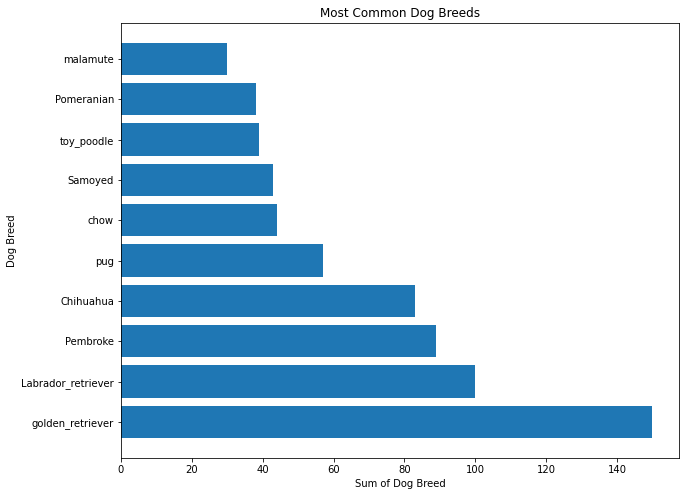

In [113]:
plt.subplots(figsize=(10,8))
locations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
heights = dog_breeds
labels = dog_breeds.index
plt.barh(locations, heights, tick_label = labels)
plt.title('Most Common Dog Breeds')
plt.xlabel('Sum of Dog Breed')
plt.ylabel('Dog Breed')

In [114]:
# finding the  highest ratings
tweets_archive.groupby(['tweet_id', 'rating_numerator', 'rating_denominator']).rating_numerator.sum().sort_values(ascending=False)

tweet_id            rating_numerator  rating_denominator
749981277374128128  1776.0            10                    1776.0
855860136149123072  666.0             10                     666.0
855862651834028034  420.0             10                     420.0
670842764863651840  420.0             10                     420.0
731156023742988288  204.0             170                    204.0
                                                             ...  
675153376133427200  1.0               10                       1.0
673716320723169284  1.0               10                       1.0
671550332464455680  1.0               10                       1.0
835152434251116546  0.0               10                       0.0
746906459439529985  0.0               10                       0.0
Name: rating_numerator, Length: 2163, dtype: float64

In [115]:
tweets_archive.loc[tweets_archive['tweet_id'] == '749981277374128128']

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,id,retweet_count,favorite_count
800,749981277374128128,2016-07-04 15:00:45+00:00,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,7.499812773741281e+17,2269,4765


The most rated dog is a dog called atticus with a whooping rating of 1776/10. It has 2272 total retweets and has a favorite count of 4772


### Insights:
1.dog tweet id '744234799360020481' has the highest  number of retweet with a retweet count of 70474. It also as the most favorite dog with a favorite count of 144487. The dog is a labrador retriever

2.The most rated dog is a dog called atticus with a whooping rating of 1776/10. It has 2272 total retweets and has a favorite count of 4772

3.The golden retriever is the most common dog breed with a total count of over 140 dpgs